## Project Week8 Markov chain

* We have anonymously tracked the movement of all DOODL customers during a five-day week. 
* In the following files you find tabular data indicating where customers spent their time. 

Our sales department is interested in a summary of the collected data. Please generate a report including numbers and diagrams. Note that your audience are not data scientists, so take care to prepare insights that are as clear as possible. We are interested in the following:
1. Calculate the total number of customers in each section
2. Calculate the total number of customers in each section over time
3. Display the number of customers at checkout over time
4. Calculate the time each customer spent in the market
5. Calculate the total number of customers present in the supermarket over time.
6. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

Hint for working with the data:
* extract a single customer ID and see what you can get done for that one before trying the same for all.
* if you have a timestamp, this one usually belongs in the index.
* if you are wondering what happened in the minutes for which you have no data: all customers stay where they are.
* consider .resample() to fill up the minutes in between
* where was customer #7 on Monday at 7:06? This is a good customer to look at in more detail

In [188]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
mon = pd.read_csv('/Users/Carina/Documents/SpicedAcademy/Week8/monday.csv', sep=';', parse_dates=True)
tue = pd.read_csv('/Users/Carina/Documents/SpicedAcademy/Week8/tuesday.csv', sep=';', parse_dates=True)
wed = pd.read_csv('/Users/Carina/Documents/SpicedAcademy/Week8/wednesday.csv', sep=';', parse_dates=True)
thu = pd.read_csv('/Users/Carina/Documents/SpicedAcademy/Week8/thursday.csv', sep=';', parse_dates=True)
fri = pd.read_csv('/Users/Carina/Documents/SpicedAcademy/Week8/friday.csv', sep=';', parse_dates=True)

In [190]:
# One complete dataframe:

df = pd.concat([mon, tue, wed, thu, fri])
df['datetime'] = pd.to_datetime(df['timestamp'])

In [191]:
df['time'] = df['datetime'].dt.time
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month
df['date'] = df['datetime'].dt.date

In [195]:
datetime_index(df)

KeyError: 'timestamp'

In [201]:
df.head(3)

,customer_no,location,time,hour,day,month,date
datetime,,,,,,,
2019-09-02 07:03:00,1,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:03:00,2,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:04:00,3,dairy,07:04:00,7,0,9,2019-09-02


In [135]:
def missing_values(df):
    return df.isna().any()
    return df.isnull().values.any()

In [59]:
def datetime_index(df):
    df['datetime'] = pd.to_datetime(df['timestamp']) # convert column to datetime object
    df.set_index('datetime', inplace=True) # set column 'datetime' to index
    del df['timestamp']


In [60]:
datetime_index(mon)
datetime_index(tue)
datetime_index(wed)
datetime_index(thu)
datetime_index(fri)

In [149]:
# Customer Number 7:

df.loc[df['customer_no']==7]

,customer_no,location,time,day,month,date
datetime,,,,,,
2019-09-02 07:04:00,7,spices,07:04:00,0,9,2019-09-02
2019-09-02 07:05:00,7,drinks,07:05:00,0,9,2019-09-02
2019-09-02 07:09:00,7,spices,07:09:00,0,9,2019-09-02
2019-09-02 07:11:00,7,fruit,07:11:00,0,9,2019-09-02
2019-09-02 07:13:00,7,checkout,07:13:00,0,9,2019-09-02
2019-09-03 07:07:00,7,dairy,07:07:00,1,9,2019-09-03
2019-09-03 07:10:00,7,fruit,07:10:00,1,9,2019-09-03
2019-09-03 07:12:00,7,drinks,07:12:00,1,9,2019-09-03
2019-09-03 07:15:00,7,checkout,07:15:00,1,9,2019-09-03


## 1. Calculate the total number of customers in each section

In [196]:
mon.groupby('location').count()

,timestamp,customer_no
location,,
checkout,1437,1437
dairy,895,895
drinks,797,797
fruit,1005,1005
spices,750,750


In [83]:
cust_per_section = pd.DataFrame(mon.groupby('location').count())
cust_per_section['tue'] = pd.DataFrame(tue.groupby('location').count())
cust_per_section['wed'] = pd.DataFrame(wed.groupby('location').count())
cust_per_section['thu'] = pd.DataFrame(thu.groupby('location').count())
cust_per_section['fri'] = pd.DataFrame(fri.groupby('location').count())

In [97]:
cust_per_section.rename(columns={"customer_no": "mon"}, inplace=True)
cust_per_section

,mon,tue,wed,thu,fri
location,,,,,
checkout,1437,1420,1526,1532,1502
dairy,895,911,976,965,932
drinks,797,713,775,776,844
fruit,1005,976,1043,1041,1057
spices,750,694,730,790,790


Text(0, 0.5, '# of customers')

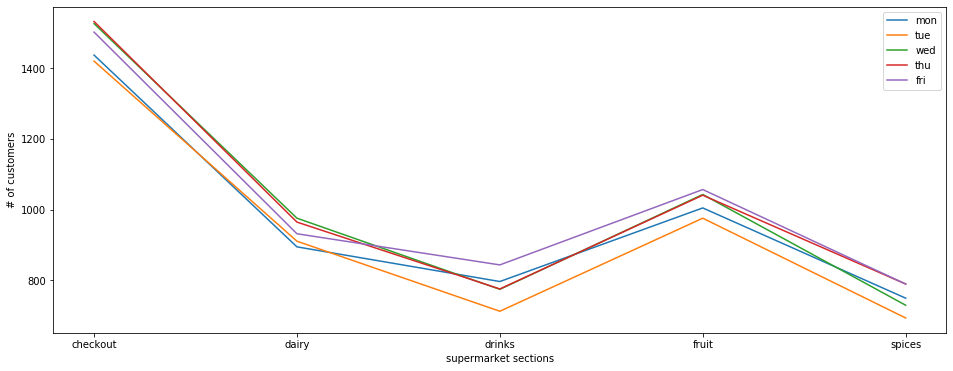

In [197]:
plt.figure(figsize=(16,6))
plt.plot(cust_per_section)
days = list(cust_per_section.columns)
plt.legend(days)
plt.xlabel('supermarket sections')
plt.ylabel('# of customers')

In [153]:
customers_section = pd.DataFrame(df.groupby('location').count()['customer_no'])
customers_section

,customer_no
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


## 2. Calculate the total number of customers in each section over time

In [200]:
customers_over_time = pd.DataFrame(df.groupby(['location', 'time']).count().unstack('location')['customer_no'])
customers_over_time.fillna(0)

location,checkout,dairy,drinks,fruit,spices
time,,,,,
07:00:00,0.0,3.0,3.0,4.0,0.0
07:01:00,2.0,4.0,1.0,1.0,1.0
07:02:00,5.0,1.0,1.0,1.0,1.0
07:03:00,1.0,8.0,2.0,3.0,2.0
07:04:00,2.0,5.0,1.0,2.0,4.0
...,...,...,...,...,...
21:46:00,5.0,1.0,5.0,6.0,3.0
21:47:00,5.0,5.0,1.0,5.0,1.0
21:48:00,7.0,7.0,2.0,3.0,4.0


Text(0, 0.5, '# of customers')

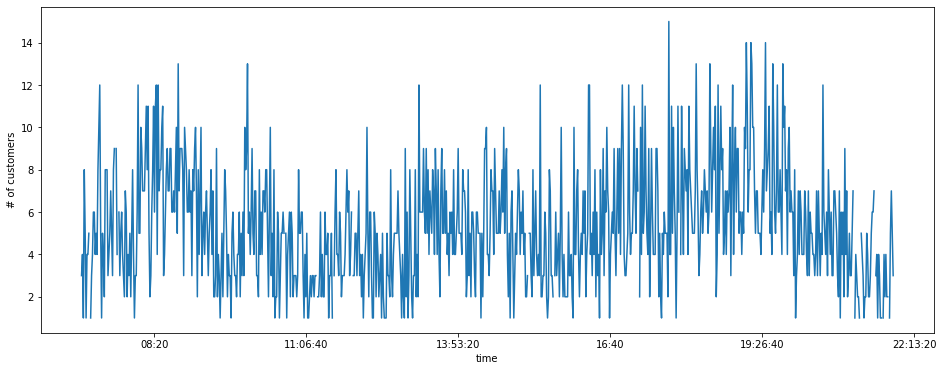

In [181]:
plt.figure(figsize=(16,6))
customers_over_time['dairy'].plot()
#plt.plot(customers_over_time.index, customers_over_time['dairy'])
plt.xlabel('time')
plt.ylabel('# of customers')

## 3. Display the number of customers at checkout over time

Text(0, 0.5, '# of customers')

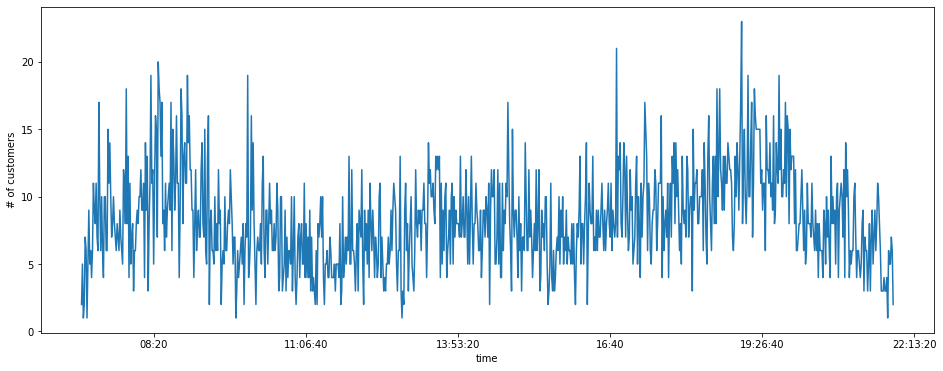

In [207]:
plt.figure(figsize=(16,6))
customers_over_time['checkout'].plot()
plt.xlabel('time')
plt.ylabel('# of customers')

## 4. Calculate the time each customer spent in the market

In [212]:
df.groupby(['day', 'customer_no']).min()

location      time  hour  month        date
day customer_no                                             
0   1            checkout  07:03:00     7      9  2019-09-02
    2            checkout  07:03:00     7      9  2019-09-02
    3            checkout  07:04:00     7      9  2019-09-02
    4            checkout  07:04:00     7      9  2019-09-02
    5            checkout  07:04:00     7      9  2019-09-02
...                   ...       ...   ...    ...         ...
4   1506            dairy  21:48:00    21      9  2019-09-06
    1507         checkout  21:48:00    21      9  2019-09-06
    1508         checkout  21:48:00    21      9  2019-09-06
    1509           drinks  21:50:00    21      9  2019-09-06
    1510           spices  21:50:00    21      9  2019-09-06

[7445 rows x 5 columns]